# **Reading Data**

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#data = pd.read_csv("/content/breast-cancer-wisconsin.csv")
#data2 = pd.read_csv("/content/breast-cancer-wisconsin2.csv")
#data3 = pd.read_csv("/content/breast-cancer-wisconsin3.csv")
data = pd.read_csv('/content/breast-cancer-wisconsin (1).csv')

import random

for i in range(len(data['Bare Nuclei'])):
  if data['Bare Nuclei'][i].isdigit()==False:
    data['Bare Nuclei'][i]=random.randint(1,10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# **SVM**

In [224]:
for i in range(len(data['Class'])):
  if data['Class'][i] == 4:
    data['Class'][i]=1
  else:
    data['Class'][i]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [225]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score,cross_val_predict
import numpy as np
from sklearn.model_selection import GridSearchCV

train,test= train_test_split(data,test_size=0.2,stratify=data['Class'],random_state=42)
X_train = train[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                 'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
Y_train = train.Class
X_test = test[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                 'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
Y_test = test.Class
#data['Bare Nuclei'] = data['Bare Nuclei'].astype(float)

In [226]:
param_grid = {
    'C': [0.1,1,5, 10,25,50,75, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
    }

In [227]:
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2,cv=10)
grid.fit(X_train,Y_train)
grid.best_params_
grid.best_estimator_

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=

SVC(C=5, gamma=0.01)

In [228]:
#clf = svm.SVC(C=1, gamma=0.001, kernel='sigmoid')
#clf = svm.SVC(C=1,gamma='auto',random_state=42,kernel='rbf')
#clf = svm.SVC(C=5,gamma=0.01,random_state=42)
clf = svm.SVC(kernel='rbf',C=1,gamma='auto')
clf.fit(X_train, Y_train)

Predict = clf.predict(X_test)
score = accuracy_score(Y_test, Predict)
scores = cross_val_score(clf, X_train, Y_train,cv=10, scoring='accuracy')
Cross_Predict= cross_val_predict(clf,X_train,Y_train,cv=5)
Confusion_M = confusion_matrix(Y_train,Cross_Predict)
PScore = Confusion_M[1][1] /(Confusion_M[1][1] + Confusion_M[0][1])
RScore = Confusion_M[1][1] / (Confusion_M[1][1] + Confusion_M[1][0])
F1Score = (2 * PScore * RScore)/(PScore + RScore)
Sensitivity =  Confusion_M[1][1] /(Confusion_M[1][1] + Confusion_M[1][0])
Specificity = Confusion_M[0][0] / (Confusion_M[0][0] + Confusion_M[0][1])
y_Scores = cross_val_predict(clf,X_train,Y_train,cv=5,method="decision_function")
precisions, recalls, thresholds=precision_recall_curve(Y_train,y_Scores)
RA_Scores = roc_auc_score(Y_train,y_Scores)

Accuracy: 0.9642857142857143
Cross Validation Score: [1.         1.         0.94642857 0.94642857 0.94642857 0.96428571
 0.94642857 0.94642857 0.94642857 0.94545455]
Confusion matrix: 
[[343  23]
 [  1 192]]
Precision score:  0.8930232558139535
Recall score:  0.9948186528497409
F1 score:  0.9411764705882353
Sensitivity:  0.9948186528497409
Specificity:  0.9371584699453552
ROC_AUC_Scores:  0.9871174155553668






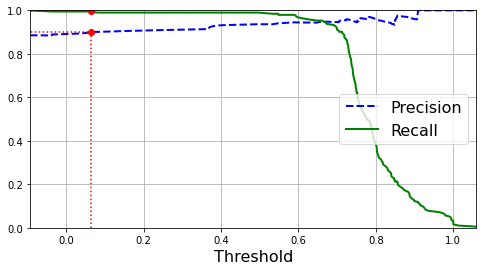

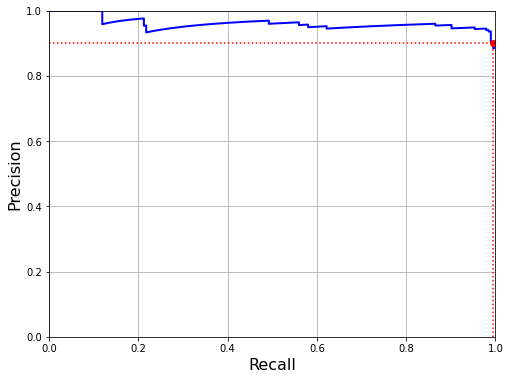

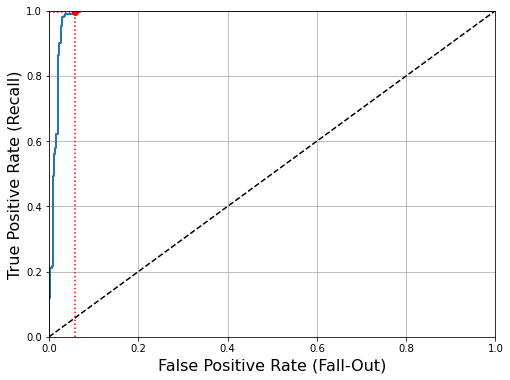

In [229]:
print('Accuracy:',score)
print('Cross Validation Score:',scores)
print('Confusion matrix: ')
print(Confusion_M)
print('Precision score: ',PScore)
print('Recall score: ',RScore)
print('F1 score: ',F1Score)
print('Sensitivity: ',Sensitivity)
print('Specificity: ',Specificity)
print("ROC_AUC_Scores: ", RA_Scores)
print('\n')
print('\n')
#print('precisions: ',precisions)
#print('recalls: ',recalls)
#print('thresholds: ',thresholds)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
  plt.legend(loc="center right", fontsize=16) # Not shown in the book
  plt.xlabel("Threshold", fontsize=16)        # Not shown
  plt.grid(True)                              # Not shown
  plt.axis([min(thresholds), max(thresholds), 0, 1])  

recall_90_precision = recalls[np.argmax(precisions[:-1] >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions[:-1] >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-1, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-1, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
#save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()
#"""
def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls, precisions, "b-", linewidth=2)
  plt.xlabel("Recall", fontsize=16)
  plt.ylabel("Precision", fontsize=16)
  plt.axis([0, 1, 0, 1])
  plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
#save_fig("precision_vs_recall_plot")
plt.show()

fpr, tpr, thresholds = roc_curve(Y_train,y_Scores)
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.axis([0, 1, 0, 1])                                    # Not shown in the book
  plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
  plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
  plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
#save_fig("roc_curve_plot")                                    # Not shown
plt.show()

# **SGDClassifier**

In [230]:
#data = pd.read_csv("/content/breast-cancer-wisconsin.csv")
data = pd.read_csv("/content/breast-cancer-wisconsin (1).csv")

import random

for i in range(len(data['Bare Nuclei'])):
  if data['Bare Nuclei'][i].isdigit()==False:
    data['Bare Nuclei'][i]=random.randint(1,10)

for i in range(len(data['Class'])):
  if data['Class'][i] == 4:
    data['Class'][i]=1
  else:
    data['Class'][i]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [231]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score,cross_val_predict
import numpy as np

train,test= train_test_split(data,test_size=0.2,stratify=data['Class'],random_state=42)
X_train = train[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                 'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
Y_train = train.Class
X_test = test[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                 'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
Y_test = test.Class
#data['Bare Nuclei'] = data['Bare Nuclei'].astype(float)

In [232]:
from sklearn.model_selection import GridSearchCV
sgd=SGDClassifier(max_iter=1000)
param_grid = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}
CV_sgd = GridSearchCV(sgd, param_grid, cv= 10)
CV_sgd.fit(X_train, Y_train)

CV_sgd.best_params_
CV_sgd.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(loss='squared_hinge', penalty='none')

In [233]:
clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
#clf = SGDClassifier(max_iter=1000, alpha=0.1,loss='log', random_state=42)
clf.fit(X_train, Y_train)

Predict = clf.predict(X_test)
score = accuracy_score(Y_test, Predict)
scores = cross_val_score(clf, X_train, Y_train,scoring='accuracy')
Cross_Predict= cross_val_predict(clf,X_train,Y_train,cv=5)
Confusion_M = confusion_matrix(Y_train,Cross_Predict)
PScore = Confusion_M[1][1] /(Confusion_M[1][1] + Confusion_M[0][1])
RScore = Confusion_M[1][1] / (Confusion_M[1][1] + Confusion_M[1][0])
F1Score = (2 * PScore * RScore)/(PScore + RScore)
Sensitivity =  Confusion_M[1][1] /(Confusion_M[1][1] + Confusion_M[1][0])
Specificity = Confusion_M[0][0] / (Confusion_M[0][0] + Confusion_M[0][1])
y_Scores = cross_val_predict(clf,X_train,Y_train,cv=5,method="decision_function")
precisions, recalls, thresholds=precision_recall_curve(Y_train,y_Scores)
RA_Scores = roc_auc_score(Y_train,y_Scores)

Accuracy: 0.9714285714285714
Cross Validation Score: [0.91964286 0.94642857 0.96428571 0.94642857 0.98198198]
Confusion matrix: 
[[357   9]
 [ 18 175]]
Precision score:  0.9510869565217391
Recall score:  0.9067357512953368
F1 score:  0.9283819628647215
Sensitivity:  0.9067357512953368
Specificity:  0.9754098360655737
ROC_AUC_Scores:  0.9908830940853366






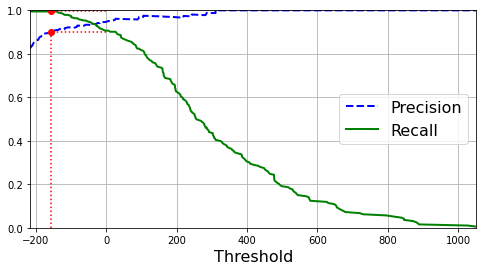

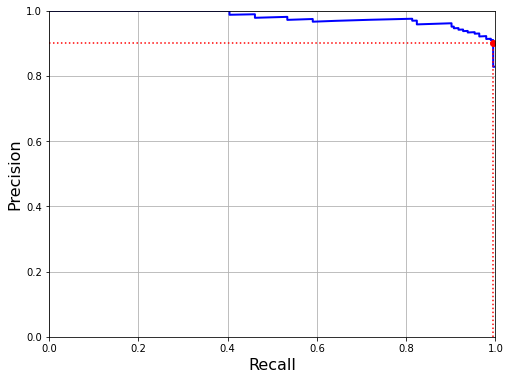

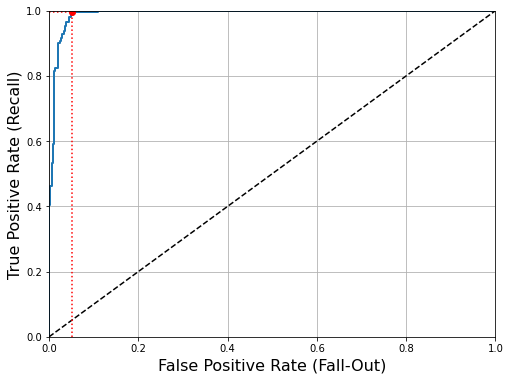

In [234]:
print('Accuracy:',score)
print('Cross Validation Score:',scores)
print('Confusion matrix: ')
print(Confusion_M)
print('Precision score: ',PScore)
print('Recall score: ',RScore)
print('F1 score: ',F1Score)
print('Sensitivity: ',Sensitivity)
print('Specificity: ',Specificity)
print("ROC_AUC_Scores: ", RA_Scores)
print('\n')
print('\n')
#print('precisions: ',precisions)
#print('recalls: ',recalls)
#print('thresholds: ',thresholds)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
  plt.legend(loc="center right", fontsize=16) # Not shown in the book
  plt.xlabel("Threshold", fontsize=16)        # Not shown
  plt.grid(True)                              # Not shown
  plt.axis([min(thresholds), max(thresholds), 0, 1])  

recall_90_precision = recalls[np.argmax(precisions[:-1] >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions[:-1] >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-1, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-1, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
#save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()
#"""
def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls, precisions, "b-", linewidth=2)
  plt.xlabel("Recall", fontsize=16)
  plt.ylabel("Precision", fontsize=16)
  plt.axis([0, 1, 0, 1])
  plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
#save_fig("precision_vs_recall_plot")
plt.show()

fpr, tpr, thresholds = roc_curve(Y_train,y_Scores)
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.axis([0, 1, 0, 1])                                    # Not shown in the book
  plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
  plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
  plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
#save_fig("roc_curve_plot")                                    # Not shown
plt.show()

# **Random Forest**

In [235]:
#data = pd.read_csv("/content/breast-cancer-wisconsin.csv")
data = pd.read_csv("/content/breast-cancer-wisconsin (1).csv")

import random

for i in range(len(data['Bare Nuclei'])):
  if data['Bare Nuclei'][i].isdigit()==False:
    data['Bare Nuclei'][i]=random.randint(1,10)

for i in range(len(data['Class'])):
  if data['Class'][i] == 4:
    data['Class'][i]=1
  else:
    data['Class'][i]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [236]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score,cross_val_predict
import numpy as np

train,test= train_test_split(data,test_size=0.2,stratify=data['Class'],random_state=42)
X_train = train[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                 'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
Y_train = train.Class
X_test = test[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                 'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
Y_test = test.Class
#data['Bare Nuclei'] = data['Bare Nuclei'].astype(float)

In [237]:
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, Y_train)
CV_rfc.best_params_
CV_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=500,
                       random_state=42)

In [238]:
#clf = RandomForestClassifier( criterion= 'gini', max_depth= 6, max_features='auto',n_estimators= 500 , random_state=42)
clf = RandomForestClassifier( criterion='entropy', max_depth=8, n_estimators=500, random_state=42)
clf.fit(X_train, Y_train)

Predict = clf.predict(X_test)
score = accuracy_score(Y_test, Predict)
scores = cross_val_score(clf, X_train, Y_train,scoring='accuracy')
Cross_Predict= cross_val_predict(clf,X_train,Y_train,cv=5)
Confusion_M = confusion_matrix(Y_train,Cross_Predict)
PScore = Confusion_M[1][1] /(Confusion_M[1][1] + Confusion_M[0][1])
RScore = Confusion_M[1][1] / (Confusion_M[1][1] + Confusion_M[1][0])
F1Score = (2 * PScore * RScore)/(PScore + RScore)
Sensitivity =  Confusion_M[1][1] /(Confusion_M[1][1] + Confusion_M[1][0])
Specificity = Confusion_M[0][0] / (Confusion_M[0][0] + Confusion_M[0][1])
y_Scores = cross_val_predict(clf,X_train,Y_train,cv=5,method="predict")
precisions, recalls, thresholds=precision_recall_curve(Y_train,y_Scores)
RA_Scores = roc_auc_score(Y_train,y_Scores)

Accuracy: 0.9714285714285714
Cross Validation Score: [0.97321429 0.96428571 0.97321429 0.97321429 0.98198198]
Confusion matrix: 
[[357   9]
 [  6 187]]
Precision score:  0.9540816326530612
Recall score:  0.9689119170984456
F1 score:  0.961439588688946
Sensitivity:  0.9689119170984456
Specificity:  0.9754098360655737
ROC_AUC_Scores:  0.9721608765820096






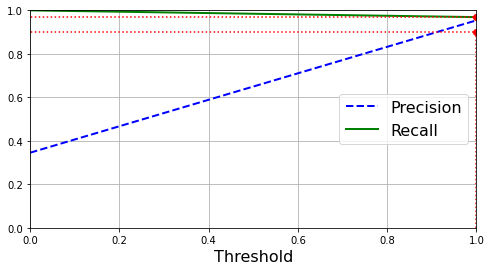

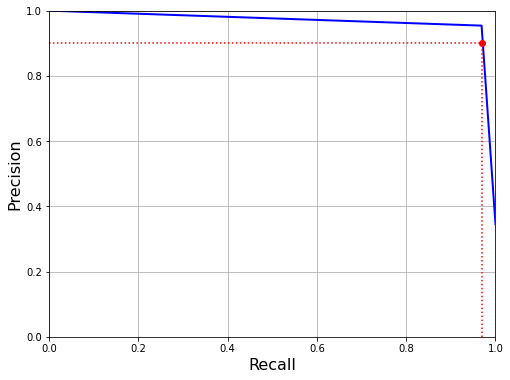

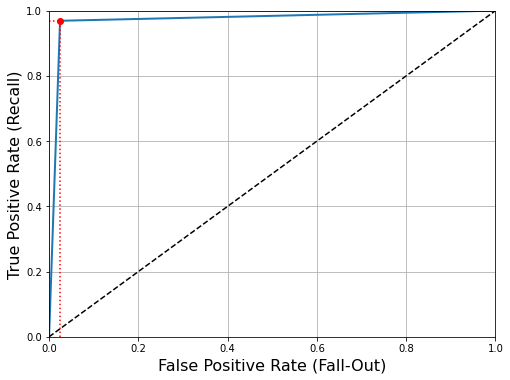

In [239]:
print('Accuracy:',score)
print('Cross Validation Score:',scores)
print('Confusion matrix: ')
print(Confusion_M)
print('Precision score: ',PScore)
print('Recall score: ',RScore)
print('F1 score: ',F1Score)
print('Sensitivity: ',Sensitivity)
print('Specificity: ',Specificity)
print("ROC_AUC_Scores: ", RA_Scores)
print('\n')
print('\n')
#print('precisions: ',precisions)
#print('recalls: ',recalls)
#print('thresholds: ',thresholds)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
  plt.legend(loc="center right", fontsize=16) # Not shown in the book
  plt.xlabel("Threshold", fontsize=16)        # Not shown
  plt.grid(True)                              # Not shown
  plt.axis([min(thresholds), max(thresholds), 0, 1])  

recall_90_precision = recalls[np.argmax(precisions[:-1] >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions[:-1] >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-1, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-1, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
#save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()
#"""
def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls, precisions, "b-", linewidth=2)
  plt.xlabel("Recall", fontsize=16)
  plt.ylabel("Precision", fontsize=16)
  plt.axis([0, 1, 0, 1])
  plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
#save_fig("precision_vs_recall_plot")
plt.show()

fpr, tpr, thresholds = roc_curve(Y_train,y_Scores)
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.axis([0, 1, 0, 1])                                    # Not shown in the book
  plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
  plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
  plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
#save_fig("roc_curve_plot")                                    # Not shown
plt.show()

# **DecisionTreeClassifier**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Accuracy: 0.9357142857142857
Cross Validation Score: [0.94642857 0.94642857 0.89285714 0.91071429 0.92857143 0.89285714
 0.92857143 0.92857143 0.96428571 0.94545455]
Confusion matrix: 
[[343  23]
 [ 21 172]]
Precision score:  0.882051282051282
Recall score:  0.8911917098445595
F1 score:  0.8865979381443297
Sensitivity:  0.8911917098445595
Specificity:  0.9371584699453552
ROC_AUC_Scores:  0.9141750898949574






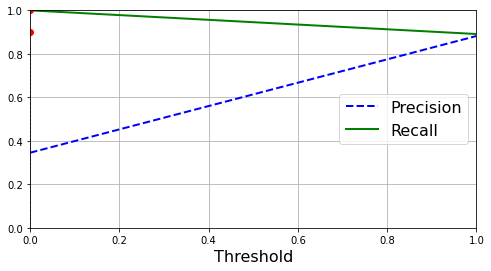

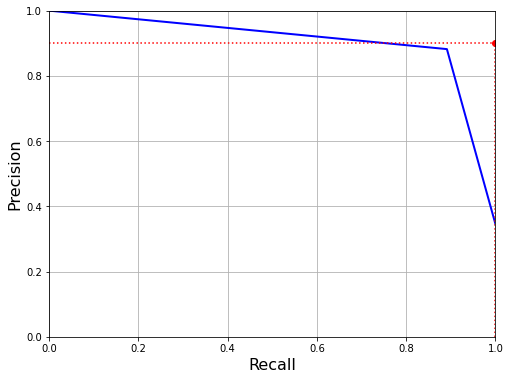

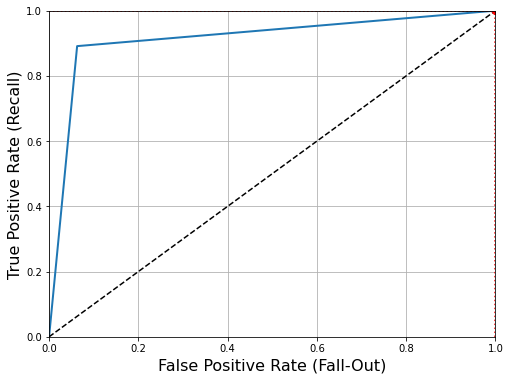

In [240]:
#data = pd.read_csv("/content/breast-cancer-wisconsin.csv")
data = pd.read_csv("/content/breast-cancer-wisconsin (1).csv")

import random

for i in range(len(data['Bare Nuclei'])):
  if data['Bare Nuclei'][i].isdigit()==False:
    data['Bare Nuclei'][i]=random.randint(1,10)

for i in range(len(data['Class'])):
  if data['Class'][i] == 4:
    data['Class'][i]=1
  else:
    data['Class'][i]=0

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score,cross_val_predict
import numpy as np

train,test= train_test_split(data,test_size=0.2,stratify=data['Class'],random_state=42)
X_train = train[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                 'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
Y_train = train.Class
X_test = test[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                 'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
Y_test = test.Class
#data['Bare Nuclei'] = data['Bare Nuclei'].astype(float)

clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train, Y_train)

Predict = clf.predict(X_test)
score = accuracy_score(Y_test, Predict)
scores = cross_val_score(clf, X_train, Y_train, cv=10,scoring='accuracy')
Cross_Predict= cross_val_predict(clf,X_train,Y_train,cv=5)
Confusion_M = confusion_matrix(Y_train,Cross_Predict)
PScore = Confusion_M[1][1] /(Confusion_M[1][1] + Confusion_M[0][1])
RScore = Confusion_M[1][1] / (Confusion_M[1][1] + Confusion_M[1][0])
F1Score = (2 * PScore * RScore)/(PScore + RScore)
Sensitivity =  Confusion_M[1][1] /(Confusion_M[1][1] + Confusion_M[1][0])
Specificity = Confusion_M[0][0] / (Confusion_M[0][0] + Confusion_M[0][1])
y_Scores = cross_val_predict(clf,X_train,Y_train,cv=5,method="predict")
precisions, recalls, thresholds=precision_recall_curve(Y_train,y_Scores)
RA_Scores = roc_auc_score(Y_train,y_Scores)

print('Accuracy:',score)
print('Cross Validation Score:',scores)
print('Confusion matrix: ')
print(Confusion_M)
print('Precision score: ',PScore)
print('Recall score: ',RScore)
print('F1 score: ',F1Score)
print('Sensitivity: ',Sensitivity)
print('Specificity: ',Specificity)
print("ROC_AUC_Scores: ", RA_Scores)
print('\n')
print('\n')
#print('precisions: ',precisions)
#print('recalls: ',recalls)
#print('thresholds: ',thresholds)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
  plt.legend(loc="center right", fontsize=16) # Not shown in the book
  plt.xlabel("Threshold", fontsize=16)        # Not shown
  plt.grid(True)                              # Not shown
  plt.axis([min(thresholds), max(thresholds), 0, 1])  

recall_90_precision = recalls[np.argmax(precisions[:-1] >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions[:-1] >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-1, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-1, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
#save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()
#"""
def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls, precisions, "b-", linewidth=2)
  plt.xlabel("Recall", fontsize=16)
  plt.ylabel("Precision", fontsize=16)
  plt.axis([0, 1, 0, 1])
  plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
#save_fig("precision_vs_recall_plot")
plt.show()

fpr, tpr, thresholds = roc_curve(Y_train,y_Scores)
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.axis([0, 1, 0, 1])                                    # Not shown in the book
  plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
  plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
  plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
#save_fig("roc_curve_plot")                                    # Not shown
plt.show()

# **KNeighborsClassifier**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Accuracy: 0.9428571428571428
Cross Validation Score: [0.96428571 0.98214286 0.96428571 0.94642857 0.98214286 0.98214286
 0.94642857 0.98214286 0.98214286 0.98181818]
Confusion matrix: 
[[357   9]
 [  6 187]]
Precision score:  0.9540816326530612
Recall score:  0.9689119170984456
F1 score:  0.961439588688946
Sensitivity:  0.9689119170984456
Specificity:  0.9754098360655737
ROC_AUC_Scores:  0.9721608765820096






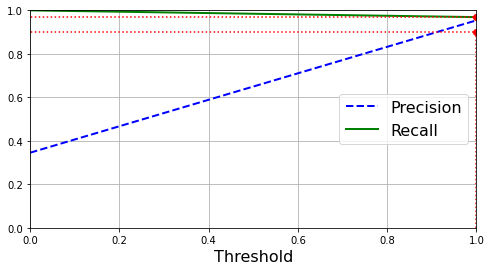

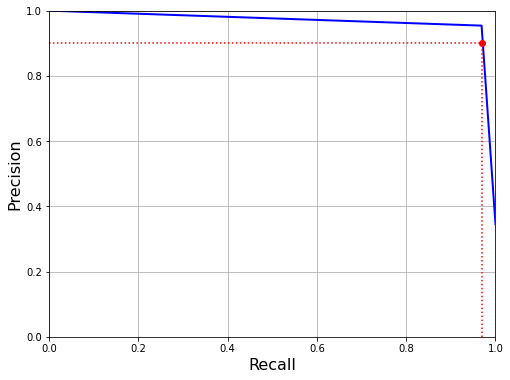

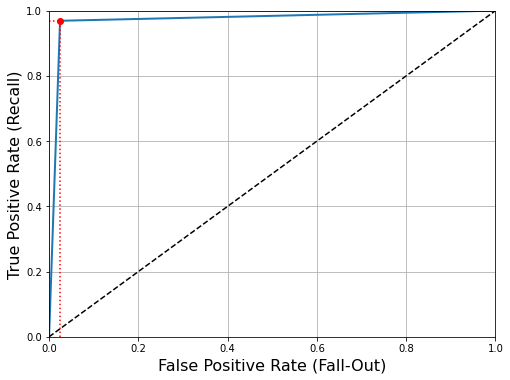

In [241]:
#data = pd.read_csv("/content/breast-cancer-wisconsin.csv")
data = pd.read_csv("/content/breast-cancer-wisconsin (1).csv")

import random

for i in range(len(data['Bare Nuclei'])):
  if data['Bare Nuclei'][i].isdigit()==False:
    data['Bare Nuclei'][i]=random.randint(1,10)

for i in range(len(data['Class'])):
  if data['Class'][i] == 4:
    data['Class'][i]=1
  else:
    data['Class'][i]=0

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score,cross_val_predict
import numpy as np

train,test= train_test_split(data,test_size=0.2,stratify=data['Class'],random_state=42)
X_train = train[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                 'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
Y_train = train.Class
X_test = test[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                 'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
Y_test = test.Class
#data['Bare Nuclei'] = data['Bare Nuclei'].astype(float)

clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)

Predict = clf.predict(X_test)
score = accuracy_score(Y_test, Predict)
scores = cross_val_score(clf, X_train, Y_train, cv=10,scoring='accuracy')
Cross_Predict= cross_val_predict(clf,X_train,Y_train,cv=5)
Confusion_M = confusion_matrix(Y_train,Cross_Predict)
PScore = Confusion_M[1][1] /(Confusion_M[1][1] + Confusion_M[0][1])
RScore = Confusion_M[1][1] / (Confusion_M[1][1] + Confusion_M[1][0])
F1Score = (2 * PScore * RScore)/(PScore + RScore)
Sensitivity =  Confusion_M[1][1] /(Confusion_M[1][1] + Confusion_M[1][0])
Specificity = Confusion_M[0][0] / (Confusion_M[0][0] + Confusion_M[0][1])
y_Scores = cross_val_predict(clf,X_train,Y_train,cv=5,method="predict")
precisions, recalls, thresholds=precision_recall_curve(Y_train,y_Scores)
RA_Scores = roc_auc_score(Y_train,y_Scores)

print('Accuracy:',score)
print('Cross Validation Score:',scores)
print('Confusion matrix: ')
print(Confusion_M)
print('Precision score: ',PScore)
print('Recall score: ',RScore)
print('F1 score: ',F1Score)
print('Sensitivity: ',Sensitivity)
print('Specificity: ',Specificity)
print("ROC_AUC_Scores: ", RA_Scores)
print('\n')
print('\n')
#print('precisions: ',precisions)
#print('recalls: ',recalls)
#print('thresholds: ',thresholds)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
  plt.legend(loc="center right", fontsize=16) # Not shown in the book
  plt.xlabel("Threshold", fontsize=16)        # Not shown
  plt.grid(True)                              # Not shown
  plt.axis([min(thresholds), max(thresholds), 0, 1])  

recall_90_precision = recalls[np.argmax(precisions[:-1] >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions[:-1] >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-1, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-1, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
#save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()
#"""
def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls, precisions, "b-", linewidth=2)
  plt.xlabel("Recall", fontsize=16)
  plt.ylabel("Precision", fontsize=16)
  plt.axis([0, 1, 0, 1])
  plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
#save_fig("precision_vs_recall_plot")
plt.show()

fpr, tpr, thresholds = roc_curve(Y_train,y_Scores)
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.axis([0, 1, 0, 1])                                    # Not shown in the book
  plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
  plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
  plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
#save_fig("roc_curve_plot")                                    # Not shown
plt.show()

# **GaussianNB**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Accuracy: 0.9571428571428572
Cross Validation Score: [0.99107143 0.9375     0.96428571 0.94642857 0.96396396]
Confusion matrix: 
[[349  17]
 [  5 188]]
Precision score:  0.9170731707317074
Recall score:  0.9740932642487047
F1 score:  0.9447236180904522
Sensitivity:  0.9740932642487047
Specificity:  0.953551912568306
ROC_AUC_Scores:  0.9638225884085052






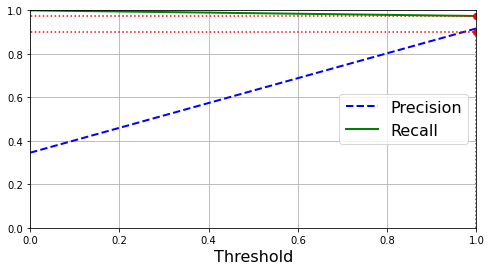

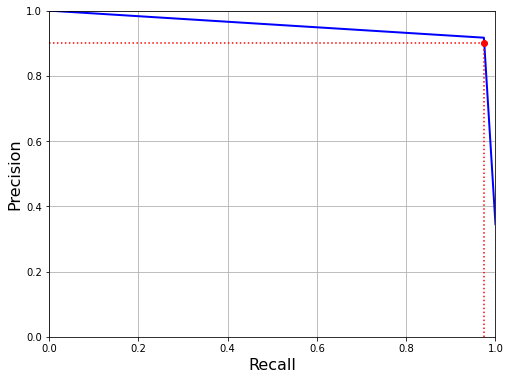

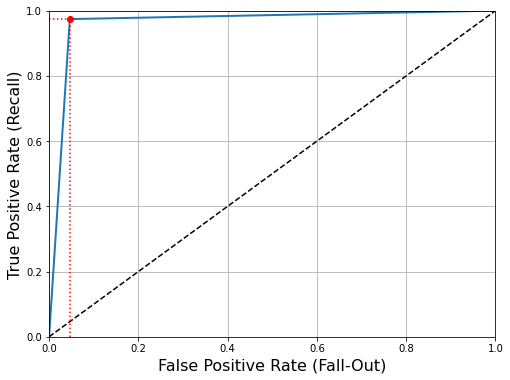

In [242]:
#data = pd.read_csv("/content/breast-cancer-wisconsin.csv")
data = pd.read_csv("/content/breast-cancer-wisconsin (1).csv")

import random

for i in range(len(data['Bare Nuclei'])):
  if data['Bare Nuclei'][i].isdigit()==False:
    data['Bare Nuclei'][i]=random.randint(1,10)

for i in range(len(data['Class'])):
  if data['Class'][i] == 4:
    data['Class'][i]=1
  else:
    data['Class'][i]=0

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score,cross_val_predict
import numpy as np

train,test= train_test_split(data,test_size=0.2,stratify=data['Class'],random_state=42)
X_train = train[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                 'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
Y_train = train.Class
X_test = test[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                 'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
Y_test = test.Class
#data['Bare Nuclei'] = data['Bare Nuclei'].astype(float)

clf = GaussianNB()
clf.fit(X_train, Y_train)

Predict = clf.predict(X_test)
score = accuracy_score(Y_test, Predict)
scores = cross_val_score(clf, X_train, Y_train, cv=5,scoring='accuracy')
Cross_Predict= cross_val_predict(clf,X_train,Y_train,cv=5)
Confusion_M = confusion_matrix(Y_train,Cross_Predict)
PScore = Confusion_M[1][1] /(Confusion_M[1][1] + Confusion_M[0][1])
RScore = Confusion_M[1][1] / (Confusion_M[1][1] + Confusion_M[1][0])
F1Score = (2 * PScore * RScore)/(PScore + RScore)
Sensitivity =  Confusion_M[1][1] /(Confusion_M[1][1] + Confusion_M[1][0])
Specificity = Confusion_M[0][0] / (Confusion_M[0][0] + Confusion_M[0][1])
y_Scores = cross_val_predict(clf,X_train,Y_train,cv=5,method="predict")
precisions, recalls, thresholds=precision_recall_curve(Y_train,y_Scores)
RA_Scores = roc_auc_score(Y_train,y_Scores)

print('Accuracy:',score)
print('Cross Validation Score:',scores)
print('Confusion matrix: ')
print(Confusion_M)
print('Precision score: ',PScore)
print('Recall score: ',RScore)
print('F1 score: ',F1Score)
print('Sensitivity: ',Sensitivity)
print('Specificity: ',Specificity)
print("ROC_AUC_Scores: ", RA_Scores)
print('\n')
print('\n')
#print('precisions: ',precisions)
#print('recalls: ',recalls)
#print('thresholds: ',thresholds)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
  plt.legend(loc="center right", fontsize=16) # Not shown in the book
  plt.xlabel("Threshold", fontsize=16)        # Not shown
  plt.grid(True)                              # Not shown
  plt.axis([min(thresholds), max(thresholds), 0, 1])  

recall_90_precision = recalls[np.argmax(precisions[:-1] >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions[:-1] >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-1, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-1, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
#save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()
#"""
def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls, precisions, "b-", linewidth=2)
  plt.xlabel("Recall", fontsize=16)
  plt.ylabel("Precision", fontsize=16)
  plt.axis([0, 1, 0, 1])
  plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
#save_fig("precision_vs_recall_plot")
plt.show()

fpr, tpr, thresholds = roc_curve(Y_train,y_Scores)
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.axis([0, 1, 0, 1])                                    # Not shown in the book
  plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
  plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
  plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
#save_fig("roc_curve_plot")                                    # Not shown
plt.show()

# **MLPClassifier**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptro

Accuracy: 0.9428571428571428
Cross Validation Score: [0.99107143 0.96428571 0.95535714 0.96428571 0.98198198]
Confusion matrix: 
[[357   9]
 [  9 184]]
Precision score:  0.9533678756476683
Recall score:  0.9533678756476683
F1 score:  0.9533678756476683
Sensitivity:  0.9533678756476683
Specificity:  0.9754098360655737
ROC_AUC_Scores:  0.959207508706362






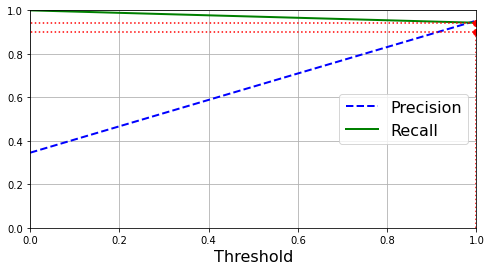

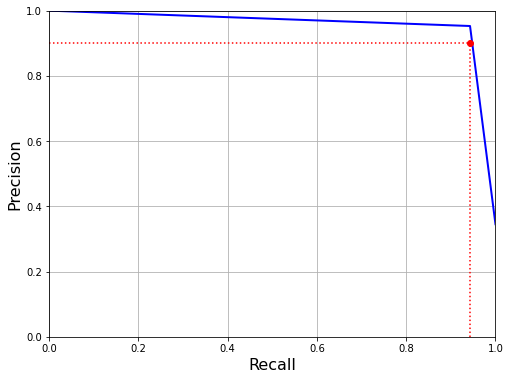

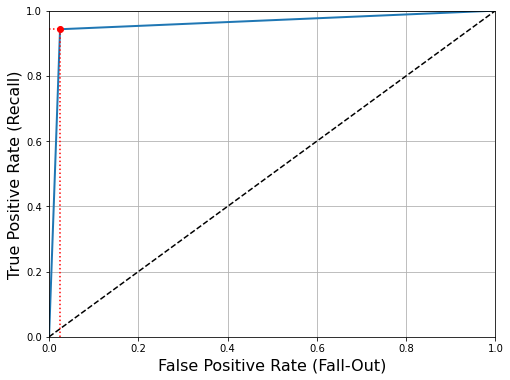

In [243]:
#data = pd.read_csv("/content/breast-cancer-wisconsin.csv")
data = pd.read_csv("/content/breast-cancer-wisconsin (1).csv")

import random

for i in range(len(data['Bare Nuclei'])):
  if data['Bare Nuclei'][i].isdigit()==False:
    data['Bare Nuclei'][i]=random.randint(1,10)

for i in range(len(data['Class'])):
  if data['Class'][i] == 4:
    data['Class'][i]=1
  else:
    data['Class'][i]=0

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score,cross_val_predict
import numpy as np

train,test= train_test_split(data,test_size=0.2,stratify=data['Class'],random_state=42)
X_train = train[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                 'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
Y_train = train.Class
X_test = test[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                 'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
Y_test = test.Class
#data['Bare Nuclei'] = data['Bare Nuclei'].astype(float)

clf = MLPClassifier()
clf.fit(X_train, Y_train)

Predict = clf.predict(X_test)
score = accuracy_score(Y_test, Predict)
scores = cross_val_score(clf, X_train, Y_train, cv=5,scoring='accuracy')
Cross_Predict= cross_val_predict(clf,X_train,Y_train,cv=5)
Confusion_M = confusion_matrix(Y_train,Cross_Predict)
PScore = Confusion_M[1][1] /(Confusion_M[1][1] + Confusion_M[0][1])
RScore = Confusion_M[1][1] / (Confusion_M[1][1] + Confusion_M[1][0])
F1Score = (2 * PScore * RScore)/(PScore + RScore)
Sensitivity =  Confusion_M[1][1] /(Confusion_M[1][1] + Confusion_M[1][0])
Specificity = Confusion_M[0][0] / (Confusion_M[0][0] + Confusion_M[0][1])
y_Scores = cross_val_predict(clf,X_train,Y_train,cv=5,method="predict")
precisions, recalls, thresholds=precision_recall_curve(Y_train,y_Scores)
RA_Scores = roc_auc_score(Y_train,y_Scores)

print('Accuracy:',score)
print('Cross Validation Score:',scores)
print('Confusion matrix: ')
print(Confusion_M)
print('Precision score: ',PScore)
print('Recall score: ',RScore)
print('F1 score: ',F1Score)
print('Sensitivity: ',Sensitivity)
print('Specificity: ',Specificity)
print("ROC_AUC_Scores: ", RA_Scores)
print('\n')
print('\n')
#print('precisions: ',precisions)
#print('recalls: ',recalls)
#print('thresholds: ',thresholds)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
  plt.legend(loc="center right", fontsize=16) # Not shown in the book
  plt.xlabel("Threshold", fontsize=16)        # Not shown
  plt.grid(True)                              # Not shown
  plt.axis([min(thresholds), max(thresholds), 0, 1])  

recall_90_precision = recalls[np.argmax(precisions[:-1] >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions[:-1] >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-1, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-1, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
#save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()
#"""
def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls, precisions, "b-", linewidth=2)
  plt.xlabel("Recall", fontsize=16)
  plt.ylabel("Precision", fontsize=16)
  plt.axis([0, 1, 0, 1])
  plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
#save_fig("precision_vs_recall_plot")
plt.show()

fpr, tpr, thresholds = roc_curve(Y_train,y_Scores)
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.axis([0, 1, 0, 1])                                    # Not shown in the book
  plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
  plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
  plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
#save_fig("roc_curve_plot")                                    # Not shown
plt.show()